# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils.KeyMethods import KeyMethods
from utils.LinearRegression import linear_regression
import requests
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [2]:
df = pd.read_json("problem_set.json")

In [3]:
df.columns

Index(['critics score (percent)', 'budget (millions)', 'length (minutes)',
       'curse words used (rate per hour)'],
      dtype='object')

<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

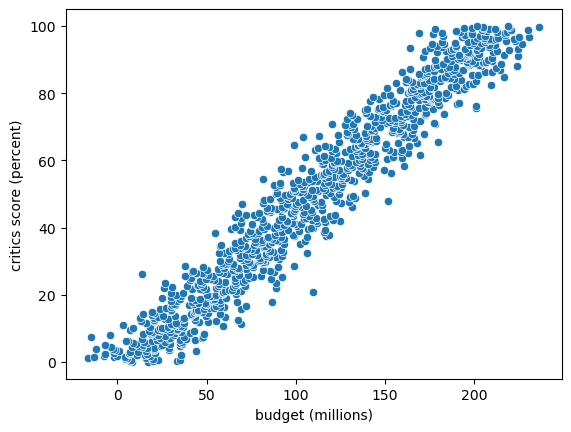

In [4]:
sns.scatterplot(data = df, x = "budget (millions)", y = "critics score (percent)")

Slope: 0.4660326442323224, Intercept: -1.3987314019554615


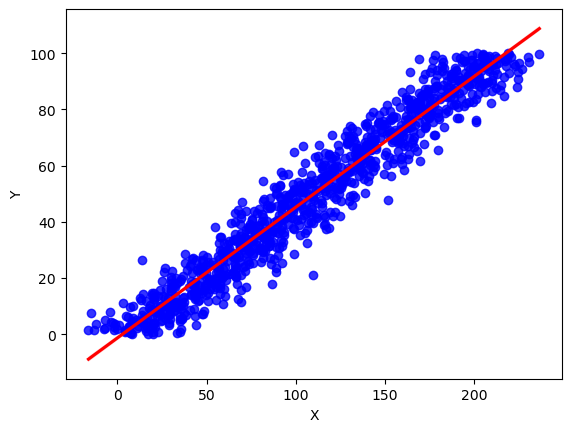

'Y = 0.4660326442323224x + -1.3987314019554615'

In [5]:
reg = linear_regression(df, 'budget (millions)', 'critics score (percent)')
reg.PlotGraph()
reg.GetEquation()

In [6]:
movies = []
for i in range(len(df)):
    budget = df.loc[i, 'budget (millions)']
    if(budget > 9 and budget < 11):
        movies.append(df.loc[i, 'critics score (percent)'])
        
sum(movies) / len(movies)

3.65365365365

***Question 1***

Using a scatterplot you see a clear direct trend, where the more spent on a movie, the higher the critics score.

***Question 2***

I put the function in my utils folder in the LinearRegression class, but here's the code which calculates the 'm' and 'b':

    def Calculate_LinearRegression(self):
        x = self.df[self.x_col].values
        y = self.df[self.y_col].values
        N = len(x)

        sum_x = sum(x)
        sum_y = sum(y)
        sum_xy = sum(x * y)
        sum_x_squared = sum(x ** 2)

        m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
        b = (sum_y - m * sum_x) / N

        return m, b


***Question 3***

The equation is Y = 0.4660326442323224x + -1.3987314019554615, and if we plug in 10 for 'x' then you get the value 3.2615950403677623, so the answer is 3.2615950403677623%.
Two movies have a budget roughly around 10 million and the average of those two is 3.653%. This leaves only a 0.3920586132822379 difference between the predicted value and the actual value. That is only a -10.7% error.

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<AxesSubplot:xlabel='length (minutes)', ylabel='critics score (percent)'>

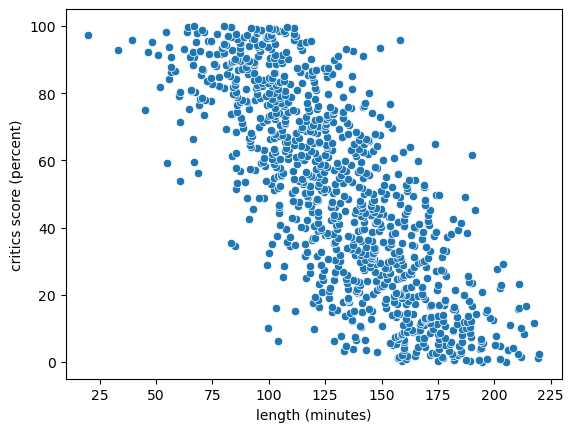

In [7]:
sns.scatterplot(data = df, x = "length (minutes)", y = "critics score (percent)")

***Question 1***

This graph is less clear than the previous, however it shows an indirect relationship where the longer the movie the worst scores it got.

Slope: -0.6341943700384426, Intercept: 132.67331245869187


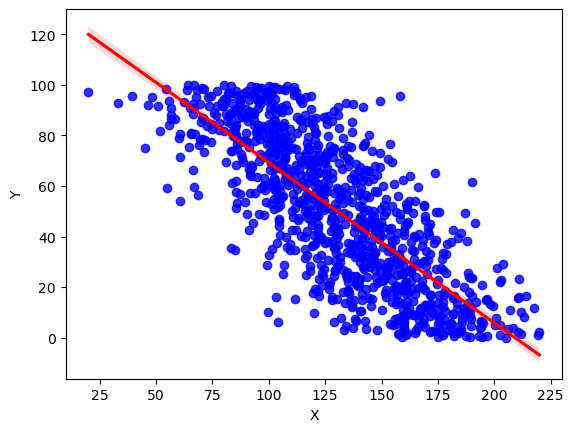

'Y = -0.6341943700384426x + 132.67331245869187'

In [8]:
reg = linear_regression(df, 'budget (millions)', 'critics score (percent)')
reg.PlotGraph()
reg.GetEquation()

***Question 2***

I put the function in my utils folder in the LinearRegression class, but here's the code which calculates the 'm' and 'b':

    def Calculate_LinearRegression(self):
        x = self.df[self.x_col].values
        y = self.df[self.y_col].values
        N = len(x)

        sum_x = sum(x)
        sum_y = sum(y)
        sum_xy = sum(x * y)
        sum_x_squared = sum(x ** 2)

        m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
        b = (sum_y - m * sum_x) / N

        return m, b
        
It returned the equation Y = -0.6341943700384426x + 132.67331245869187

In [13]:
reg.GetPrediction(150)

37.544156952925476

In [20]:
movies = []
for i in range(len(df)):
    budget = df.loc[i, 'length (minutes)']
    if(budget > 145 and budget < 155):
        movies.append(df.loc[i, 'critics score (percent)'])
        
sum(movies) / len(movies)

38.56680209619646

***Question 3***

The equation is Y = -0.6341943700384426x + 132.67331245869187, and if we plug in 150 for 'x' then you get the value 37.544156952925476, so the answer is 37.544156952925476%.
85 movies have a run length of roughly 150 minutes and the average score of those is 38%. This leaves only a -1.022645143270985 difference between the predicted value and the actual value. That is only a -2.65% error.

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

<AxesSubplot:xlabel='budget (millions)', ylabel='curse words used (rate per hour)'>

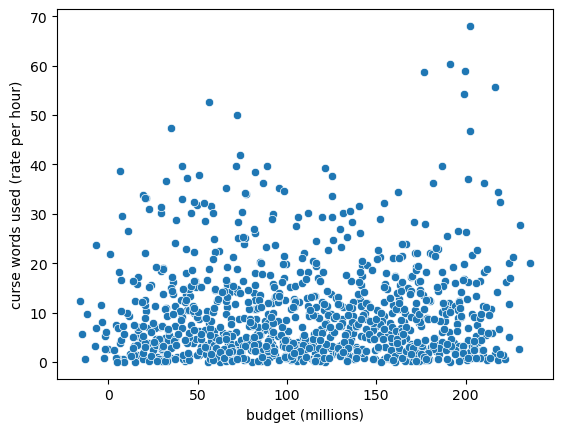

In [24]:
sns.scatterplot(data = df, x = "budget (millions)", y = "curse words used (rate per hour)")

***Question 1***

There is not a clear connection between a movies budget and the amount of curse words used. Movies with a high budget appear to have a higher range of curse words used, but that's about it.

Slope: 0.005780650959770479, Intercept: 9.240233598815475


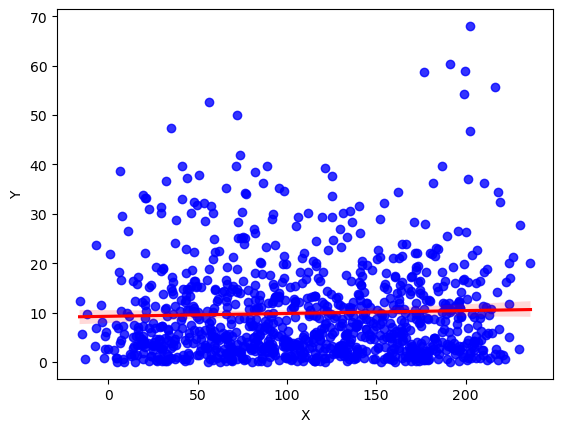

'Y = 0.005780650959770479x + 9.240233598815475'

In [25]:
reg = linear_regression(df, 'budget (millions)', 'curse words used (rate per hour)')
reg.PlotGraph()
reg.GetEquation()

***Question 2***

I put the function in my utils folder in the LinearRegression class, but here's the code which calculates the 'm' and 'b':

    def Calculate_LinearRegression(self):
        x = self.df[self.x_col].values
        y = self.df[self.y_col].values
        N = len(x)

        sum_x = sum(x)
        sum_y = sum(y)
        sum_xy = sum(x * y)
        sum_x_squared = sum(x ** 2)

        m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
        b = (sum_y - m * sum_x) / N

        return m, b
        
It returned the equation Y = 0.005780650959770479x + 9.240233598815475

In [26]:
reg.GetPrediction(5)

9.269136853614327

In [31]:
movies = []
for i in range(len(df)):
    budget = df.loc[i, 'budget (millions)']
    if(budget > 4 and budget < 6):
        movies.append(df.loc[i, 'curse words used (rate per hour)'])
        
sum(movies) / len(movies)

5.702838827283333

***Question 3***

The equation is Y = 0.005780650959770479x + 9.240233598815475, and if we plug in 5 for 'x' then you get the value 9.26913685361432 curse words per hour.
6 movies have a budget of 5 million and the average amount of curse words is 5.703 words per hour. This leaves a 3.566298026330994 difference between the predicted value and the actual value. Thats a 62% error, so it's not extremely accurate.

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

I started my function off by being quite generic, so the algorighm only differed by the parameters and how linearized the data is.

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

The algorithm for problem 2 was only off by -2.65%, so it was by far the most accurate. This however only varied by how linearized the data is. This phenomenon can be seen by problem 3 which was just a blob of data.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

Some data is so heavily skewed that a linear line cannot accuratly represent data from the problems, while others(like problem 1) fit very nicely in a line. 